# K-Means Clustering

### Dataset:  
This project explores the relationship between Social Media, Salary, Influence, Performance and Team Valuation in the NBA.


Variables:
- TEAM: Name of the NBA Team
- GMS: Games Played
- PCT_ATTENDANCE: Average % Attendance of capacity (note some teams were over capacity as an averag)
- WINNING_SEASON: If the team won over 50% of their games, it was 1, otherwise 0.
- TOTAL_ATTENDANCE_MILLIONS: Total season attendance in the millions.
- VALUE_MILLIONS: Valuation of the team in millions
- ELO: https://en.wikipedia.org/wiki/Elo_rating_system
- CONF: Eastern or Western Conference
- COUNTY: The county where the team is located
- MEDIAN_HOME_PRICE_COUNTY_MILLIONS: Median Home Price
- COUNTY_POPULATION_MILLIONS: The Population of the county in Millions
- cluster: A cluster created by KMeans clustering (shown in notebook)

In [26]:
import pandas as pd
team_data = "https://raw.githubusercontent.com/noahgift/socialpowernba/master/data/nba_2017_att_val_elo_win_housing.csv"
val_housing_win_df = pd.read_csv(team_data)
numerical_df = val_housing_win_df.loc[:,["TOTAL_ATTENDANCE_MILLIONS", "ELO", "VALUE_MILLIONS", "MEDIAN_HOME_PRICE_COUNTY_MILLIONS"]]

In [27]:
val_housing_win_df.head()
val_housing_win_df.describe()

,GMS,PCT_ATTENDANCE,WINNING_SEASON,TOTAL_ATTENDANCE_MILLIONS,VALUE_MILLIONS,ELO,MEDIAN_HOME_PRICE_COUNTY_MILLIONS,COUNTY_POPULATION_MILLIONS
count,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,3.000000e+01,30.000000
mean,41.0,93.466667,0.566667,0.733263,1355.333333,1504.833333,4.074711e+05,2.236000
std,0.0,8.544945,0.504007,0.073376,709.613704,106.843451,3.019041e+05,2.434055
min,41.0,72.000000,0.000000,0.605585,750.000000,1338.000000,1.299000e+05,0.390000
25%,41.0,86.500000,0.000000,0.679130,886.250000,1425.250000,2.710388e+05,0.972500
50%,41.0,96.500000,1.000000,0.724902,1062.500000,1510.500000,3.241990e+05,1.275000
75%,41.0,100.000000,1.000000,0.800584,1600.000000,1582.500000,4.654250e+05,2.400000
max,41.0,104.000000,1.000000,0.888882,3300.000000,1770.000000,1.725000e+06,10.100000


### Distance metrics used:
- Euclidean
- Hamming 
    - The Hamming distance between two strings, a and b is denoted as d(a,b). It is used for error detection or error correction when data is transmitted over computer networks. It is also using in coding theory for comparing equal length data words
- Cosine
- Mahalanobis 
    - measure of the distance between a point P and distribution D

#### Find Euclidean Distance

In [28]:
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

def get2DArray(row):
    return np.array([row.values.tolist()])

first_row = get2DArray(numerical_df.iloc[0])
second_row = get2DArray(numerical_df.iloc[1])

euclidean_distances(first_row, second_row)

array([[45102.33254507]])

### Standardisation
- Ensures that clusters are equally influenced by each feature/dimension

In [29]:
team_data = "https://raw.githubusercontent.com/noahgift/socialpowernba/master/data/nba_2017_att_val_elo_win_housing.csv"
val_housing_win_df = pd.read_csv(team_data)
numerical_df = val_housing_win_df.loc[:,["TOTAL_ATTENDANCE_MILLIONS", "ELO", "VALUE_MILLIONS", "MEDIAN_HOME_PRICE_COUNTY_MILLIONS"]]
numerical_df.head()

,TOTAL_ATTENDANCE_MILLIONS,ELO,VALUE_MILLIONS,MEDIAN_HOME_PRICE_COUNTY_MILLIONS
0,0.888882,1519,2500,269900.0
1,0.811366,1420,1450,314990.0
2,0.721928,1393,1075,343950.0
3,0.805400,1569,1350,389000.0
4,0.813050,1600,1125,390000.0


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.cluster import KMeans

In [31]:
%%timeit
std_cluster = make_pipeline(StandardScaler(), KMeans(n_clusters=3))
kmeans = std_cluster.fit(numerical_df)

3.02 ms ± 211 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Difference between `Pipeline()` and `make_pipeline()` from sklearn:
`make_pipeline` generates names for steps automatically.

## K-Means

#### Diagnostics
- Elbow plot
- Silhouette analysis
- Intercluster Distance Map

#### 1. Elbow Plot  
Helps to determine the optimal numner of clusters by plotting the number of clusters,k, against the distortion score. The inflection point, or "elbow" shows the best k-value that the model fits best.

K-Means: Inertia
Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

A good model is one with low inertia AND a low number of clusters (K). However, this is a tradeoff because as K increases, inertia decreases.

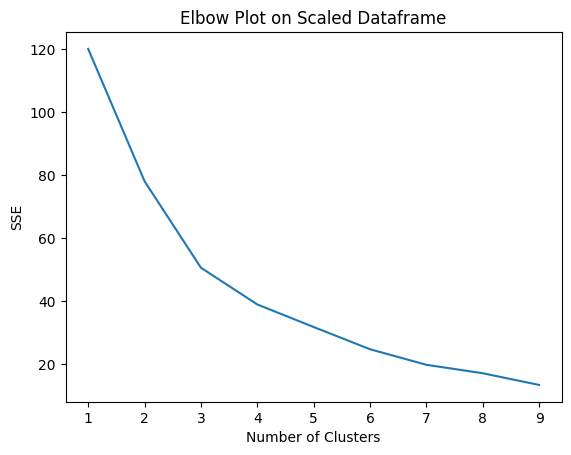

In [46]:
import matplotlib.pyplot as plt

scaler = StandardScaler()
scaled_numerical_df = scaler.fit_transform(numerical_df)

sse = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(scaled_numerical_df)
    sse.append(kmeans.inertia_)

plt.plot(range(1,10), sse)
plt.xticks(range(1,10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Plot on Scaled Dataframe")
plt.show()

From the elbow plot above, we see that there is an elbow or "bend" at k=3.
Thus, we will use 3 clusters when fitting our k-means clustering model in the next step.

#### 2. K-Means Silhouette Analysis